In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import scipy
import matplotlib

color_palette = sns.color_palette("colorblind")
sns.set_theme(palette=color_palette, font="Arial", font_scale=1.0, style="white")


#styles for error and markers in sns.lineplot

thin_custom_lw = 1.2
custom_lw = thin_custom_lw/0.65

filled_marker_style = dict(marker='o',  markersize=5,
                           color='k',
                           #markerfacecolor='green',
                           markeredgecolor='k',
                          markeredgewidth=thin_custom_lw)

filled_marker_style_white = dict(marker='o',  markersize=5,
                           color='w',
                           markerfacecolor='w',
                           markeredgecolor='w',
                          markeredgewidth=custom_lw)


error_style_white = {"capsize": 4.4, 
                "ecolor": "w",
               "barsabove":False, 
               "elinewidth":custom_lw, 
               "capthick":custom_lw,
                    "zorder": 8}

error_style = {"capsize": 4, 
                "ecolor": "k",
                "barsabove":False, 
                "elinewidth":thin_custom_lw, 
                "capthick":thin_custom_lw,
                "zorder": 9}




In [3]:
# number of iterations and seed for bootstrapping during calculation of confidence intervals
n_boot = 10000
seed = 10

In [4]:
def IV_func(V, G, V_rev, V_half, k):
    return G*(V-V_rev)/(1+np.exp(-(V-V_half)/k))

In [5]:
def make_dataframe(data_df):

    data=pd.DataFrame()
    for i in data_df["Name2"].unique():
        if len(data_df[data_df["Name2"]==i]["Series"].unique())==2:
            print(i)
            a=data_df[(data_df["Name2"]==i) \
                       & (data_df["Series"]=='IV-short')][["Name2","animal","V_V","I_pA"]].set_index('V_V')
            a=a.rename(columns={"I_pA": "I_pA_IV"})
            b=data_df[(data_df["Name2"]==i) \
                       & (data_df["Series"]=='IV-40short')][["Name2","animal","V_V","I_pA"]].set_index('V_V')
            b=b.rename(columns={"I_pA": "I_pA_IV40"})
            b=b.rename(columns={"Name2": "Name2_IV40"})
            b=b.rename(columns={"animal": "animal_IV40"})

            c=pd.concat([a,b],axis=1)
            #c["I_pA_IV40"]=c["I_pA_IV40"].fillna(int(0))
            c["I_pA_IV_diff"]=c["I_pA_IV"]-c["I_pA_IV40"]
            c=c.reset_index(level=0)

            data=pd.concat([data,c],axis=0, ignore_index=True)
    data=data.rename(columns={"V_V": "U_mV"})
    data["U_mV"]=data["U_mV"]*1000
    data["U_mV"]=data["U_mV"].astype(int)

    return data

In [84]:
#### WT ####

# load WT 'IV-short' and 'IV40-short' files, add column with unique identifier for recording
data_IV_WT=pd.read_excel("data_IV_WT.xlsx")
data_IV_40_WT=pd.read_excel("data_IV_40_WT.xlsx")
data_IV_WT["Name2"] = data_IV_WT["animal"]+"_"+data_IV_WT["Group"]+"_"+data_IV_WT["Group_Index"].astype(str)
data_IV_40_WT["Name2"] = data_IV_40_WT["animal"]+"_"+data_IV_40_WT["Group"]+"_"+data_IV_40_WT["Group_Index"].astype(str)

# append 'IV-short' to 'IV40-short' files
data_total_IV_WT=data_IV_WT.append(data_IV_40_WT)

# calculate IV-IV40 for each trace 
data_WT = make_dataframe(data_total_IV_WT)

4537_WT_E-9_1
4537_WT_E-10_2
4720_WT_E-3_1
4720_WT_E-6_4
4720_WT_E-7_5
4721_WT_E-10_3
4721_WT_E-12_5


<ipython-input-84-71485bdfeba8>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_total_IV_WT=data_IV_WT.append(data_IV_40_WT)


In [27]:
WT_n_cells = data_WT["Name2"].nunique()
WT_n_animals = data_WT["animal"].nunique()
print(f"WT number of cells: {WT_n_cells}")
print(f"WT number of animals: {WT_n_animals}")


WT number of cells: 7
WT number of animals: 3


In [31]:
#### KO ####

# load KO 'IV-short' and 'IV40-short' files, add column with unique identifier for recording
data_IV_KO=pd.read_excel("data_IV_KO.xlsx")
data_IV_40_KO=pd.read_excel("data_IV_40_KO.xlsx")
data_IV_KO["Name2"] = data_IV_KO["animal"]+"_"+data_IV_KO["Group"]+"_"+data_IV_KO["Group_Index"].astype(str)
data_IV_40_KO["Name2"] = data_IV_40_KO["animal"]+"_"+data_IV_40_KO["Group"]+"_"+data_IV_40_KO["Group_Index"].astype(str)

#append 'IV-short' to 'IV40-short' files
data_total_IV_KO=data_IV_KO.append(data_IV_40_KO)

# calculate IV-IV40 for each trace 
data_KO = make_dataframe(data_total_IV_KO)

4403_KO_E-5_1
4403_KO_E-6_2
4511_KO_E-14_3
4507_KO_E-47_2
4507_KO_E-48_3
4507_KO_E-49_4
4533_KO_E-13_1
4533_KO_E-14_2
4533_KO_E-16_4


<ipython-input-31-b5bb444546f1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_total_IV_KO=data_IV_KO.append(data_IV_40_KO)


In [29]:
KO_n_cells = data_KO["Name2"].nunique()
KO_n_animals = data_KO["animal"].nunique()
print(f"KO number of cells: {KO_n_cells}")
print(f"KO number of animals: {KO_n_animals}")

KO number of cells: 9
KO number of animals: 4


In [30]:
#### WT ####

x_WT_IV_diff=data_WT.groupby(["U_mV"])["I_pA_IV_diff"].mean().index
y_WT_IV_diff=data_WT.groupby(["U_mV"])["I_pA_IV_diff"].mean().values
yerr_WT_IV_diff=data_WT.groupby(["U_mV"])["I_pA_IV_diff"].sem().values


x_WT_IV40 = data_WT.groupby(["U_mV"])["I_pA_IV40"].mean().index
y_WT_IV40 = data_WT.groupby(["U_mV"])["I_pA_IV40"].mean().values
yerr_WT_IV40 = data_WT.groupby(["U_mV"])["I_pA_IV40"].sem().values

x_dummy = np.linspace(start=-80, stop=80, num=1000)
#y_dummy = IV_func(x_dummy, 0.51, 60, -60, 3)

print(f"Minimum WT IV diff (pA)")
WT_IV_diff_popt, pcov = scipy.optimize.curve_fit(IV_func, x_WT_IV_diff[4:],\
                            y_WT_IV_diff[4:], p0=[0.51, 60, -60, 3], maxfev = 100000)

WT_IV_diff_min = scipy.optimize.fmin(IV_func, -10, args=tuple(WT_IV_diff_popt))

print(f"Minimum WT IV40 (pA)")
WT_IV40_popt, pcov = scipy.optimize.curve_fit(IV_func, x_WT_IV40[4:],\
                            y_WT_IV40[4:], p0=[0.51, 60, -60, 3], maxfev = 100000)

WT_IV40_min = scipy.optimize.fmin(IV_func, 0, args=tuple(WT_IV40_popt))


Minimum WT IV diff (pA)
Optimization terminated successfully.
         Current function value: -50.122432
         Iterations: 22
         Function evaluations: 44
Minimum WT IV40 (pA)
Optimization terminated successfully.
         Current function value: -38.417231
         Iterations: 32
         Function evaluations: 64


In [11]:
#### KO ####

x_KO_IV_diff=data_KO.groupby(["U_mV"])["I_pA_IV_diff"].mean().index
y_KO_IV_diff=data_KO.groupby(["U_mV"])["I_pA_IV_diff"].mean().values
yerr_KO_IV_diff=data_KO.groupby(["U_mV"])["I_pA_IV_diff"].sem().values


x_KO_IV40 = data_KO.groupby(["U_mV"])["I_pA_IV40"].mean().index
y_KO_IV40 = data_KO.groupby(["U_mV"])["I_pA_IV40"].mean().values
yerr_KO_IV40 = data_KO.groupby(["U_mV"])["I_pA_IV40"].sem().values

x_dummy = np.linspace(start=-80, stop=80, num=1000)
#y_dummy = IV_func(x_dummy, 0.51, 60, -60, 3)

"""print(f"Minimum KO IV diff (pA)")
KO_IV_diff_popt, pcov = scipy.optimize.curve_fit(IV_func, x_KO_IV_diff[4:],\
                            y_KO_IV_diff[4:], p0=[0.51, 60, -60, 3], maxfev = 100000)

KO_IV_diff_min = scipy.optimize.fmin(IV_func, -10, args=tuple(KO_IV_diff_popt))"""

print(f"Minimum KO IV40 (pA)")
KO_IV40_popt, pcov = scipy.optimize.curve_fit(IV_func, x_KO_IV40[4:],\
                            y_KO_IV40[4:], p0=[0.51, 60, -60, 3], maxfev = 100000)

KO_IV40_min = scipy.optimize.fmin(IV_func, 0, args=tuple(KO_IV40_popt))

Minimum KO IV40 (pA)
Optimization terminated successfully.
         Current function value: -33.152334
         Iterations: 33
         Function evaluations: 66


In [12]:
data_WT["genotype"]="WT"
data_KO["genotype"]="KO"

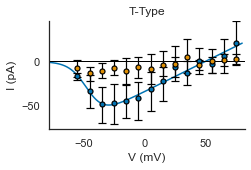

In [13]:
data = pd.concat([data_WT, data_KO], ignore_index=True)

fig, g = plt.subplots(figsize=(3.5, 2))

g = sns.lineplot(x="U_mV", y="I_pA_IV_diff", data=data, 
                 estimator=np.mean,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
                 lw=0,
                 hue='genotype',
                 palette=(color_palette[0], color_palette[1]),
             zorder=10, 
             err_style="bars",
             err_kws=error_style,
             fillstyle="full",
            **filled_marker_style)


### plot fit ###
g.plot(x_dummy,IV_func(x_dummy, *WT_IV_diff_popt), color = color_palette[0])
#g.plot(x_dummy,IV_func(x_dummy, *KO_IV_diff_popt),  color = color_palette[1])

g.axhline(0,0, color="black", lw=1)

plt.xlim(-78, 82)
plt.ylim(-78, 47)

g.set_title('T-Type')

g.set_ylabel("I (pA)")
g.set_xlabel("V (mV)")

sns.despine()

plt.legend([],[], frameon=False)

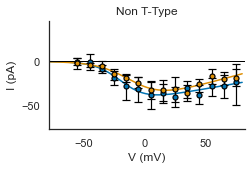

In [14]:
data = pd.concat([data_WT, data_KO], ignore_index=True)

fig, g = plt.subplots(figsize=(3.5, 2))

g = sns.lineplot(x="U_mV", y="I_pA_IV40", data=data, 
                 estimator=np.mean,
             errorbar=("ci",95),
             n_boot=n_boot, seed=seed,
                 lw=0,
                 hue='genotype',
                 palette=(color_palette[0], color_palette[1]),
             zorder=10, 
             err_style="bars",
             err_kws=error_style,
             fillstyle="full",
            **filled_marker_style)


### plot fit ###
g.plot(x_dummy,IV_func(x_dummy, *WT_IV40_popt), color = color_palette[0])
g.plot(x_dummy,IV_func(x_dummy, *KO_IV40_popt),  color = color_palette[1])

plt.xlim(-78, 82)
plt.ylim(-78, 47)


g.axhline(0,0, color="black", lw=1)

g.set_title('Non T-Type')

g.set_ylabel("I (pA)")
g.set_xlabel("V (mV)")

sns.despine()

plt.legend([],[], frameon=False)

In [15]:
pd.concat((data_WT[(data_WT['U_mV']==-35) | ( data_WT['U_mV']==15)],
            data_KO[(data_KO['U_mV']==-35) | (data_KO['U_mV']==15)]), 
          axis=0, ignore_index=True)

,U_mV,Name2,animal,I_pA_IV,Name2_IV40,animal_IV40,I_pA_IV40,I_pA_IV_diff,genotype
0,-35,4537_WT_E-9_1,4537_WT,-59.698866,4537_WT_E-9_1,4537_WT,-15.615990,-44.082876,WT
1,15,4537_WT_E-9_1,4537_WT,-55.458148,4537_WT_E-9_1,4537_WT,-25.830303,-29.627845,WT
2,-35,4537_WT_E-10_2,4537_WT,-23.179860,4537_WT_E-10_2,4537_WT,-11.643671,-11.536189,WT
3,15,4537_WT_E-10_2,4537_WT,-30.465025,4537_WT_E-10_2,4537_WT,-28.103498,-2.361527,WT
4,-35,4720_WT_E-3_1,4720_WT,-85.529493,4720_WT_E-3_1,4720_WT,-1.674296,-83.855197,WT
5,15,4720_WT_E-3_1,4720_WT,-57.011446,4720_WT_E-3_1,4720_WT,-33.010884,-24.000562,WT
6,-35,4720_WT_E-6_4,4720_WT,-66.309299,4720_WT_E-6_4,4720_WT,-3.577234,-62.732065,WT
7,15,4720_WT_E-6_4,4720_WT,-16.034094,4720_WT_E-6_4,4720_WT,-16.392914,0.358820,WT
8,-35,4720_WT_E-7_5,4720_WT,-40.220167,4720_WT_E-7_5,4720_WT,-13.314841,-26.905327,WT
9,15,4720_WT_E-7_5,4720_WT,-43.627567,4720_WT_E-7_5,4720_WT,-29.648889,-13.978678,WT


In [16]:
pd.concat((data_WT[(data_WT['U_mV']==-35) | ( data_WT['U_mV']==15)],
            data_KO[(data_KO['U_mV']==-35) | (data_KO['U_mV']==15)]), 
          axis=0, ignore_index=True).to_csv("data_patch_clamp_-35mV_15mV.csv")